# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_df=pd.DataFrame(mouse_metadata)
study_results_df=pd.DataFrame(study_results)
merge_df = pd.merge(study_results_df, mouse_metadata_df, on="Mouse ID")


# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [24]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].nunique()
print(mouse_count)

249


In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice_ID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_df = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mice_df = clean_df.loc[clean_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [29]:
# Checking the number of mice in the clean DataFrame.
clean_df = merge_df[merge_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [32]:
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
drug_agg = clean_df["Drug Regimen"].value_counts()
drug_agg

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

In [35]:
final_tumor_vol = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].max()
final_tumor_vol_df = pd.DataFrame(final_tumor_vol).reset_index()
final_tumor_vol_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,70.717621
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,63.440686
...,...,...,...
243,z435,Propriva,48.710661
244,z578,Ramicane,45.000000
245,z581,Infubinol,62.754451
246,z795,Naftisol,65.741070


In [36]:
greatest_tp = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
greatest_tp_df = pd.DataFrame(greatest_tp).reset_index()
greatest_tp_df

,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a262,Placebo,45
3,a275,Ceftamin,45
4,a366,Stelasyn,30
...,...,...,...
243,z435,Propriva,10
244,z578,Ramicane,45
245,z581,Infubinol,45
246,z795,Naftisol,45


In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_tp = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
greatest_tp_df = pd.DataFrame(greatest_tp).reset_index()

greatest_tp_df = greatest_tp_df[greatest_tp_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_tumors_df = pd.merge(greatest_tp_df, clean_df, on=['Mouse ID', 'Timepoint'], how='inner').rename(columns={'Drug Regimen_x':'Drug Regimen'}).drop(columns= 'Drug Regimen_y')
merged_tumors_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a275,Ceftamin,45,62.999356,3,Female,20,28
3,a411,Ramicane,45,38.407618,1,Male,3,22
4,a444,Ramicane,45,43.047543,0,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,68.594745,4,Female,6,27
96,y793,Capomulin,45,31.896238,2,Male,17,17
97,y865,Ceftamin,45,64.729837,3,Male,23,26
98,z578,Ramicane,45,30.638696,0,Male,11,16


In [42]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = merged_tumors_df[merged_tumors_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])] \
    .drop(columns=['Mouse ID', 'Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'])


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = clean_df["Drug Regimen"].unique().tolist()
drug_regimens



# Create empty list to fill with tumor vol data (for plotting)
#['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
capomulin_tumors = []
ramicane_tumors = []
infubinol_tumors = []
ceftamin_tumors = []



#for loop

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']:
    capomulin_tumors.append(x)
capomulin_tumors

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']:
    ramicane_tumors.append(x)
ramicane_tumors

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']:
    infubinol_tumors.append(x)
infubinol_tumors

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']:
    ceftamin_tumors.append(x)
ceftamin_tumors

[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.7846818,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

In [44]:
print(infubinol_tumors)


[67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]


In [45]:
quartile_cap = filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq_cap = quartile_cap[0.25]
median_cap = quartile_cap[0.5]
upperq_cap = quartile_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print('Capomulin')
print('---------------------------')
print("lower quartile:", lowerq_cap)
print("median:", median_cap)
print("upper quartile:", upperq_cap)
print("lower bound:", lower_bound_cap)
print("upper bound:", upper_bound_cap)

Capomulin
---------------------------
lower quartile: 32.37735684
median: 38.1251644
upper quartile: 40.1592203
lower bound: 20.70456164999999
upper bound: 51.83201549


In [46]:
#There aren't outliers for Capomulin
pot_outliers_cap = filtered_df.loc[
    (filtered_df['Drug Regimen'] == 'Capomulin') & 
    (
        (filtered_df['Tumor Volume (mm3)'] < lower_bound_cap) | 
        (filtered_df['Tumor Volume (mm3)'] > upper_bound_cap)
    ), 
    :
]

print('Capomulin potential outliers:', pot_outliers_cap)

Capomulin potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []


In [47]:
quartile_ram = filtered_df.loc[filtered_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq_ram = quartile_ram[0.25]
median_ram = quartile_ram[0.5]
upperq_ram = quartile_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print('Ramicane')
print('---------------------------')
print("lower quartile:", lowerq_ram)
print("median:", median_ram)
print("upper quartile:", upperq_ram)
print("lower bound:", lower_bound_ram)
print("upper bound:", upper_bound_ram)

Ramicane
---------------------------
lower quartile: 31.56046955
median: 36.56165229
upper quartile: 40.65900627
lower bound: 17.912664470000003
upper bound: 54.30681135


In [48]:
#there aren't ramicane outliers
pot_outliers_ram = []
pot_outliers_ram = filtered_df.loc[
    (filtered_df['Drug Regimen'] == 'Ramicane') & 
    (
        (filtered_df['Tumor Volume (mm3)'] < lower_bound_ram) | 
        (filtered_df['Tumor Volume (mm3)'] > upper_bound_ram)
    ), 
    :
]

print('Ramicane potential outliers:',pot_outliers_ram)

Ramicane potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []


In [49]:
quartile_inf = filtered_df.loc[filtered_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq_inf = quartile_inf[0.25]
median_inf = quartile_inf[0.5]
upperq_inf = quartile_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print('Infubinol')
print('---------------------------')
print("lower quartile:", lowerq_inf)
print("median:", median_inf)
print("upper quartile:", upperq_inf)
print("lower bound:", lower_bound_inf)
print("upper bound:", upper_bound_inf)

Infubinol
---------------------------
lower quartile: 54.04860769
median: 60.16518046
upper quartile: 65.52574285
lower bound: 36.83290494999999
upper bound: 82.74144559000001


In [50]:
#There is a lower bound outlier for Infubinol
pot_outliers_inf = filtered_df.loc[
    (filtered_df['Drug Regimen'] == 'Infubinol') & 
    (
        (filtered_df['Tumor Volume (mm3)'] < lower_bound_inf) | 
        (filtered_df['Tumor Volume (mm3)'] > upper_bound_inf)
    ), 
    :
]

print('Infubinol potential outliers:', pot_outliers_inf)

Infubinol potential outliers:    Drug Regimen  Tumor Volume (mm3)
15    Infubinol           36.321346


In [51]:
quartile_ceft = filtered_df.loc[filtered_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq_ceft = quartile_ceft[0.25]
median_ceft = quartile_ceft[0.5]
upperq_ceft = quartile_ceft[0.75]
iqr_ceft = upperq_ceft - lowerq_ceft
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)
print('Ceftamin')
print('---------------------------')
print("lower quartile:", lowerq_ceft)
print("median:", median_ceft)
print("upper quartile:", upperq_ceft)
print("lower bound:", lower_bound_ceft)
print("upper bound:", upper_bound_ceft)

Ceftamin
---------------------------
lower quartile: 48.72207785
median: 59.85195552
upper quartile: 64.29983003
lower bound: 25.355449580000002
upper bound: 87.66645829999999


In [52]:
#no outliers for ceftamin
pot_outliers_ceft = filtered_df.loc[
    (filtered_df['Drug Regimen'] == 'Ceftamin') & 
    (
        (filtered_df['Tumor Volume (mm3)'] < lower_bound_ceft) | 
        (filtered_df['Tumor Volume (mm3)'] > upper_bound_ceft)
    ), 
    :
]

print("Capomulin's potential outliers:", pot_outliers_ceft)

Capomulin's potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []


/var/folders/8q/2xw5tr555j9gnlkvyz4fmc840000gn/T/ipykernel_81530/2501731405.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([capomulin_data, ramicane_data, infubinol_data, ceftamin_data], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],  flierprops=flierprops)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

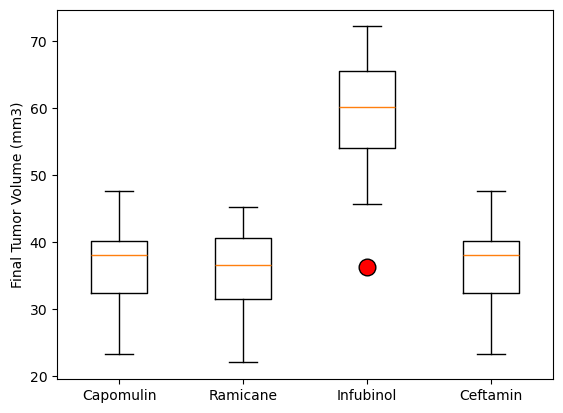

In [53]:
capomulin_data = filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
ramicane_data = filtered_df.loc[filtered_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol_data = filtered_df.loc[filtered_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
ceftamin_data = filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']

flierprops = dict(marker='o', markersize=12, markerfacecolor='red')
plt.boxplot([capomulin_data, ramicane_data, infubinol_data, ceftamin_data], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],  flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")

In [55]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (I did 3 just familiarize myself with the code)
R944= clean_df.loc[(clean_df['Mouse ID'] == 'r944'), :]
dropped_R944= R944.drop(columns= ['Mouse ID', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])
dropped_R944

,Timepoint,Tumor Volume (mm3)
239,0,45.000000
432,5,45.737145
630,10,46.544292
761,15,47.373423
1001,20,43.225671
1118,25,41.086991
1412,30,41.680791
1556,35,40.401765
1650,40,41.042045
1888,45,41.581521


Text(0.5, 1.0, 'Capomulin Treatment of Mouse R944')

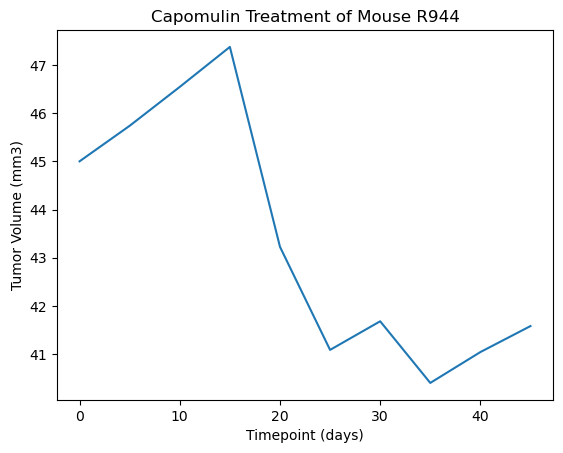

In [56]:
plt.plot(dropped_R944['Timepoint'], dropped_R944['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse R944')

In [57]:
Y793 = clean_df.loc[(clean_df['Mouse ID'] == 'y793'), :]
Y793_dropped = Y793.drop(columns= ['Mouse ID', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])
Y793_dropped

,Timepoint,Tumor Volume (mm3)
240,0,45.000000
387,5,41.019913
599,10,41.630010
767,15,42.283665
1051,20,40.716428
1292,25,38.992734
1464,30,35.726023
1564,35,36.327870
1711,40,31.475411
1797,45,31.896238


Text(0.5, 1.0, 'Capomulin Treatment of Mouse Y793')

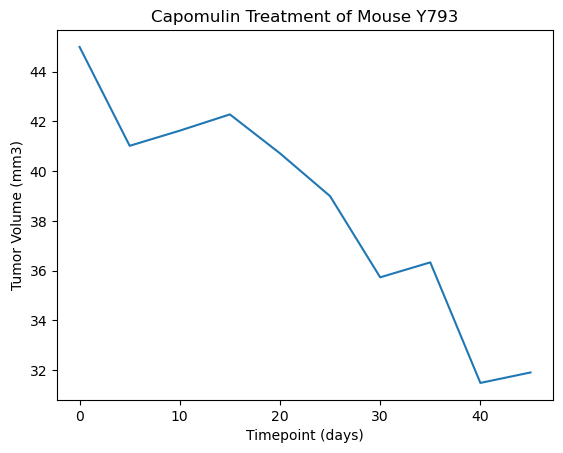

In [58]:
plt.plot(Y793_dropped['Timepoint'], Y793_dropped['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse Y793')

In [60]:
L509 = clean_df.loc[(clean_df['Mouse ID'] == 'l509'), :]
L509_dropped = L509.drop(columns= ['Mouse ID', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])
L509_dropped

,Timepoint,Tumor Volume (mm3)
231,0,45.000000
253,5,45.851193
539,10,46.759074
881,15,47.488599
982,20,48.070452
1146,25,44.006257
1414,30,44.708055
1499,35,40.207288
1723,40,40.770813
1771,45,41.483008


Text(0.5, 1.0, 'Capomulin Treatment of Mouse L509')

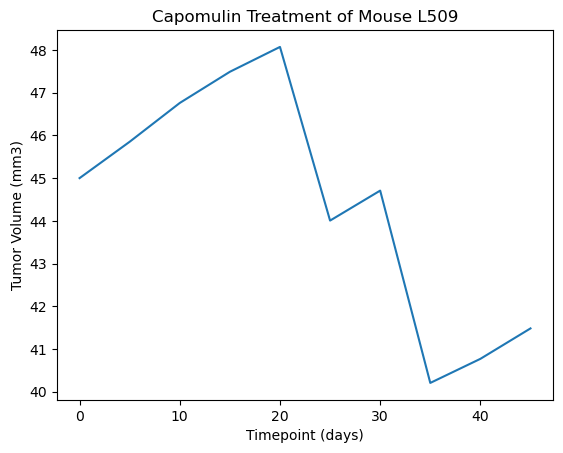

In [61]:
plt.plot(L509_dropped['Timepoint'], L509_dropped['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse L509')

In [62]:
Capomulin_W_v_T = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin'), :]
Capomulin_W_v_T

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [63]:
#getting the average tumor volume and weight per mouse ID
grouped_data = Capomulin_W_v_T.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
}).reset_index()
grouped_data

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


Text(0.5, 1.0, 'Weight v Avg Tumor Vol')

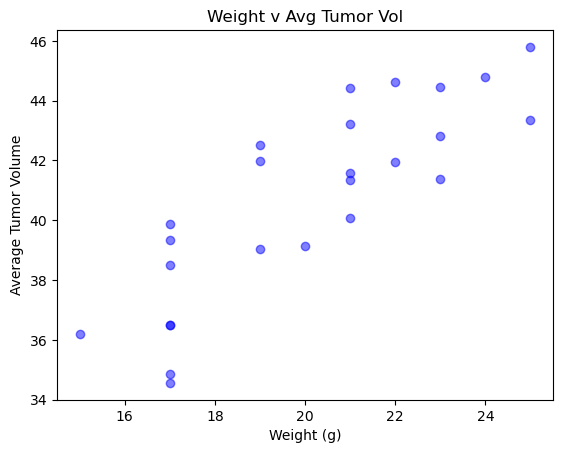

In [ ]:
#Scatter Plot Weight V Avg Tumor Vol
tumor_v_weight = plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='blue', alpha=0.5)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Weight v Avg Tumor Vol')

In [68]:
from scipy.stats import linregress


Text(0.5, 1.0, 'Weight v Avg Tumor Vol')

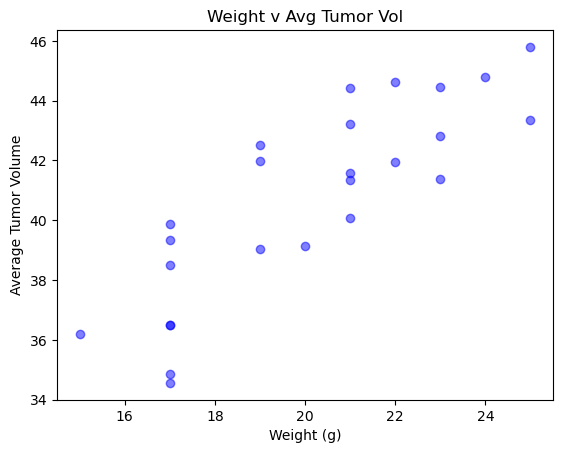

In [69]:
#Scatter Plot Weight V Avg Tumor Vol
tumor_v_weight = plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='blue', alpha=0.5)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Weight v Avg Tumor Vol')

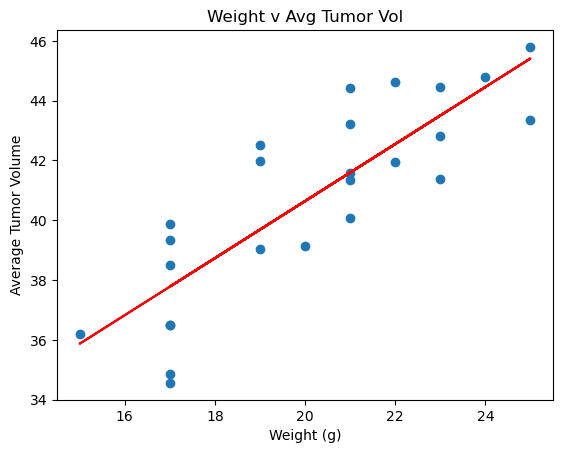

The correlation coefficient is 0.84 which indicates a positive correlation.


In [70]:
#Scatter Plot Weight V Avg Tumor Vol w/ Linear Regression Line
x = grouped_data['Weight (g)']
y = grouped_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Weight v Avg Tumor Vol')
plt.show()
correlation = st.pearsonr(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
correlation
print(f"The correlation coefficient is {round(correlation[0],2)} which indicates a positive correlation.")

In [67]:
#Scatter Plot Weight V Avg Tumor Vol w/ Linear Regression Line
x = grouped_data['Weight (g)']
y = grouped_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = lineregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Weight v Avg Tumor Vol')
plt.show()
correlation = st.pearsonr(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
correlation
print(f"The correlation coefficient is {round(correlation[0],2)} which indicates a positive correlation.")

NameError: name 'lineregress' is not defined

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = drug_agg.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = drug_agg.index.values
y_axis = drug_agg.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

In [ ]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
list_of_mouse_ids = clean_df['Mouse ID'].unique()
list_of_mouse_ids

NameError: name 'clean_df' is not defined

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [ ]:
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

In [ ]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:

# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = dropped_dups["Drug Regimen"].unique().tolist()
drug_regimens



# Create empty list to fill with tumor vol data (for plotting)
#['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
capomulin_tumors = []
ramicane_tumors = []
infubinol_tumors = []
ceftamin_tumors = []



#for loop

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']:
    capomulin_tumors.append(x)
capomulin_tumors

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']:
    ramicane_tumors.append(x)
ramicane_tumors

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']:
    infubinol_tumors.append(x)
infubinol_tumors

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']:
    ceftamin_tumors.append(x)
ceftamin_tumors
# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
